Aufgabe:
- python colab
- graph visualisieren (matplot)
- per tastenkommando weiter gehen
- Schrittweite immer erhöhen/verringern iterieren
- abbruchkriterium: 1% genauigkeit

Algo:
y=m*x



Text(0, 0.5, 'y')

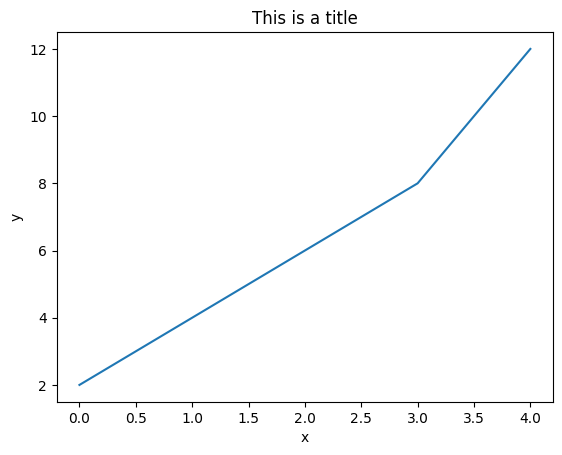

In [1]:
import matplotlib.pyplot as plt
import numpy as np

lst = np.array([2,4,6,8,12])

plt.plot(lst)
plt.title("This is a title")
plt.xlabel("x")
plt.ylabel("y")